In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
video_games_df = pd.read_csv("moved_games.csv")
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [15]:
video_games_df.columns = video_games_df.columns.str.lower()
video_games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Missing Values in "critic_score" and "user_score":** <br>
- The missing values could be due to several reasons such as the game not being reviewed or the data not being avaiable. I could consider filling the missing values with either the mean or median of the respective columns. Doing this I'm assuming that the missing values are missing at random and don't introduce bias. <br>

**Missing Values in "rating":**<br>
- The rating columns missing values could be due to be unavaiable or unassigned ratings. I could explore the distribution of existing ratings and decide whether to impute missing values based on the most common rating or use a seperate category like "Unknown".<br>

In [16]:
video_games_df['critic_score'].fillna(video_games_df["critic_score"].median(), inplace=True)
video_games_df["rating"].fillna("Unknown", inplace=True)

In [17]:
# Searching all rows in the entire DataFrame where any columns has the value "TBD".
tbd_rows = video_games_df[video_games_df.eq("TBD").any(axis=1)]
display(tbd_rows)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [18]:
video_games_df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,Unknown


**Decribing Columns with Data Type Changes:** <br>
- "year_of_release" values are represented as floats and need to be converted in a datetime object instead. Doing this will make it easier to handle date-related information.
- "user_score" is being converted to numeric, and 'TBD' values are convereted to NaN. This allows me to perform numerical operations.
- Creating a column named "total_sells" to stored in the sum of "na_sales", "eu_sales", "jp_sales", and "others_sales".

In [19]:
video_games_df["year_of_release"] = pd.to_datetime(video_games_df['year_of_release'], format="%Y", errors="coerce")
video_games_df["user_score"] = pd.to_numeric(video_games_df["user_score"], errors="coerce")
video_games_df["total_sales"] = video_games_df[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)

video_games_df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,71.0,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,Unknown,31.38


In [20]:
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     16715 non-null  float64       
 9   user_score       7590 non-null   float64       
 10  rating           16715 non-null  object        
 11  total_sales      16715 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.5+ MB


#### How many games were released in different years?

In [21]:
# Check the number of games released in the different years
games_per_year = video_games_df.groupby("year_of_release")["name"].count()

display(games_per_year)

year_of_release
1980-01-01       9
1981-01-01      46
1982-01-01      36
1983-01-01      17
1984-01-01      14
1985-01-01      14
1986-01-01      21
1987-01-01      16
1988-01-01      15
1989-01-01      17
1990-01-01      16
1991-01-01      41
1992-01-01      43
1993-01-01      60
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     289
1998-01-01     379
1999-01-01     338
2000-01-01     350
2001-01-01     482
2002-01-01     829
2003-01-01     775
2004-01-01     762
2005-01-01     939
2006-01-01    1006
2007-01-01    1197
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2011-01-01    1136
2012-01-01     653
2013-01-01     544
2014-01-01     581
2015-01-01     606
2016-01-01     502
Name: name, dtype: int64

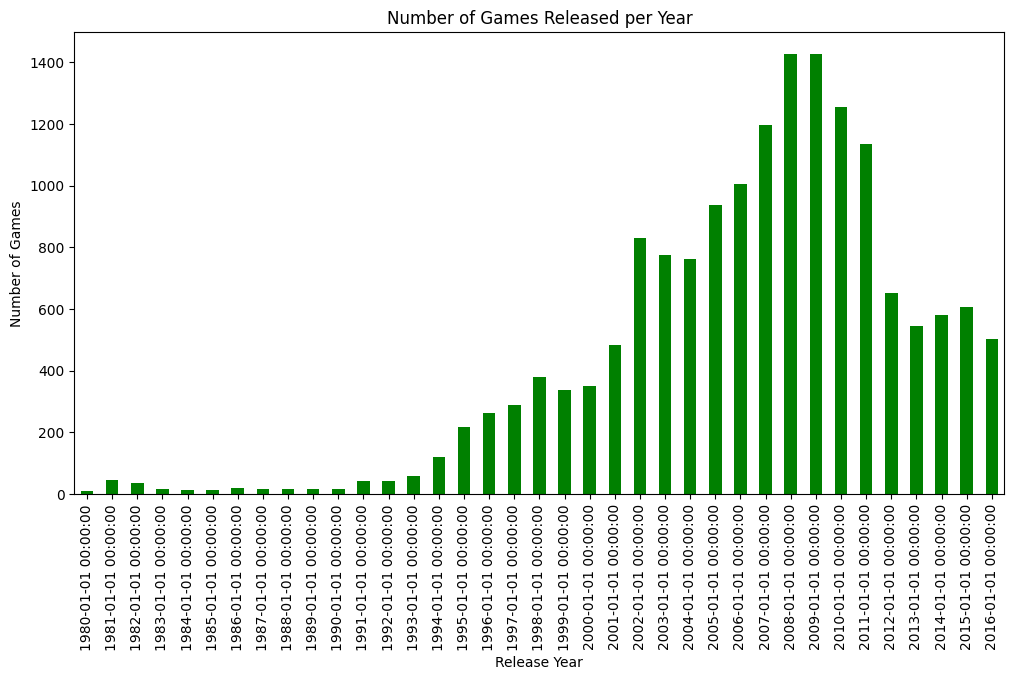

In [22]:
# Plot a bar chart for better visualization
plt.figure(figsize=(12, 6))
games_per_year.plot(kind="bar", color="green")
plt.title("Number of Games Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.show()

**Observation:** <br>
The increase in game release betwwen 2002 and 2011 could be attributed to several factors related to gaming industry and technology landscape during that period. Here are some possible reasons: <br>

- **Technological Advancements:** The early 2000s saw significant advancements in gaming technology, including improvements in graphics, processing power, and gaming consoles. This could have motivated game developers to create and release more sophisticated and visually appealing games. <br>

- **Introduction of New Consoles:** The launch of new gaming consoles, such as the Xbox 360 (released in 2005), PlayStation 3 (released in 2006), and Nintendo Wii (released in 2006), provided developers with new platforms to target. The availability of these consoles likely increased the overall number of games in the market. <br>

- **Rise of Indie Game Development** The 2000s witnessed a surge in indie game development. With the advent of digital distribution platforms and easier access to game development tools, smaller studios and individual developers could create and release games more easily .<br>

- **Globalization of the Gaming Industry:** The gaming industry became more globalized during this period. Game developers from various regions around the world had better opportunities to create and distribute their games to a broader audience. <br>

- **Increased Consumer Demand:** As gaming became more mainstream, the demand for diverse gaming experiences grew. This increased demand could have driven developers to release a larger variety of games to cater to different preferences. <br>

- **Online Gaming and Multiplayer Trends:** The popularity of online gaming and multiplayer experiences grew during this time. Developers responded to this trend by creating more online-enabled games, expanding the range of gaming experiences. <br>

- **Digital Distribution Platforms:** The emergence of digital distribution platforms, such as Steam, allowed for easier distribution of games directly to consumers. This shift reduced some barriers to entry for game developers, encouraging more releases. <br>

- **Marketing and Advertising Efforts:** Increased investment in marketing and advertising for video games could have contributed to higher awareness and sales. This period saw a growing emphasis on promoting and branding games to reach a wider audience.


#### 2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [28]:
# Sales variation from platform to platform
sales_by_platforms = video_games_df.groupby("platform")["total_sales"].sum()

print("Sales per Platform")
print("-------------------")
display(sales_by_platforms)

Sales per Platform
-------------------


platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64

In [30]:
# Display platforms with the greatest total sales.
top_platforms = sales_by_platforms.sort_values(ascending=False).head()
print("Top platforms by total sales:")
print("------------------------------")
display(top_platforms)

Top platforms by total sales:
------------------------------


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

In [34]:
# Distribution of sales for each year for thr top platform
top_platform = top_platforms.index[0]
sales_by_year_top_platform = (
    video_games_df[video_games_df["platform"] == top_platform]
    .groupby("year_of_release")["total_sales"]
    .sum()
)

# Display the distribution
print("\nDistribution of sales for the top platform:", top_platform)
print("-------------------------------------------------")
print(sales_by_year_top_platform)


Distribution of sales for the top platform: PS2
-------------------------------------------------
year_of_release
2000-01-01     39.17
2001-01-01    166.43
2002-01-01    205.38
2003-01-01    184.31
2004-01-01    211.81
2005-01-01    160.66
2006-01-01    103.42
2007-01-01     75.99
2008-01-01     53.90
2009-01-01     26.40
2010-01-01      5.64
2011-01-01      0.45
Name: total_sales, dtype: float64


In [35]:
# Platforms with sero sales
zero_sales_platforms = sales_by_platforms[sales_by_platforms == 0].index
print("\nPlatforms with zero sales:")
print("-----------------------------")
print(zero_sales_platforms)


Platforms with zero sales:
-----------------------------
Index([], dtype='object', name='platform')
